In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

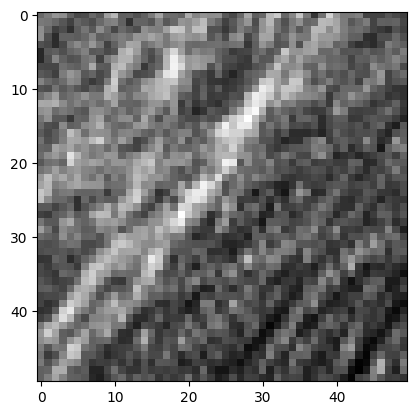

In [15]:
imgDir= "./pictures/81.png"
ksize = 10 # Kernel Size
sigma = 3 # Large sigma on small features will fully miss the features. 
#theta = (1/4) * np.pi  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
thetaRange= np.linspace(0, np.pi, 19)
lamda = (1) * np.pi #1/4 works best for angled. 
gamma= 1e-1  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
phi = 0  #Phase offset. I leave it to 0. 

img = cv2.imread(imgDir)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

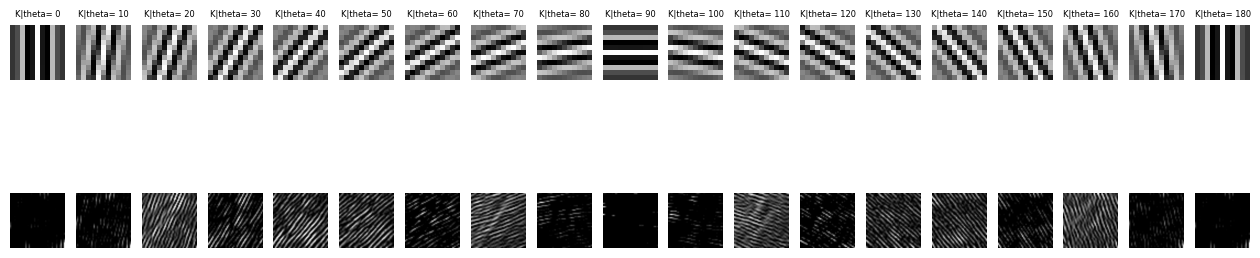

In [16]:
fig, axs= plt.subplots(2, thetaRange.size)
mean_brightness= np.zeros(thetaRange.shape)

for i, theta in enumerate(thetaRange): 
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi)
    fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)

    # kernel_resized = cv2.resize(kernel, (400, 400))    # Resize image
    img_resized = cv2.resize(img, (400, 400))           # Resize image
    fimg_resized = cv2.resize(fimg, (400, 400))         # Resize image

    mean_brightness[i]= np.mean(fimg)

    # axs[i, 0].imshow(img_resized, cmap='gray')
    axs[0, i].imshow(kernel, cmap='gray')
    axs[0, i].set_title(f"K|theta= {(180/np.pi)*theta:.0f}", fontsize= 6)
    axs[0, i].axis("off")

    axs[1, i].imshow(fimg_resized, cmap='gray')
    axs[1, i].axis("off")
    

plt.subplots_adjust(hspace= None)

fig.set_size_inches(16, 4)
    

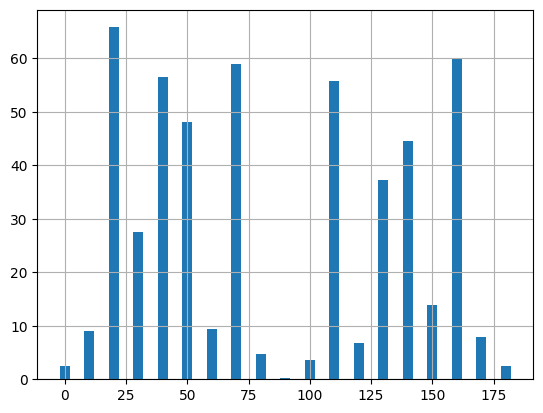

In [17]:
plt.bar((180/np.pi)*thetaRange, mean_brightness, width= 4)
plt.grid()